Importing fundamental libraries for data science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV file with Pandas Library

In [2]:
dados = pd.read_csv('data.csv')

Checking the first five lines

In [3]:
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Dropping columns id and Unnamed: 32 sicne they are unimportant

In [4]:
dados = dados.drop(['id','Unnamed: 32'],axis=1)

In [5]:
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Countplot to check the amount of each type of cancer

Text(0.5, 1.0, 'Kind of diagnostic')

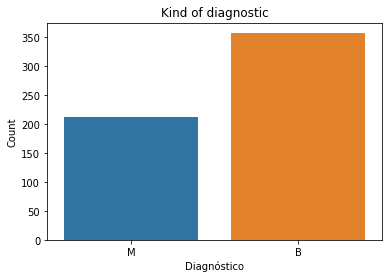

In [6]:
sns.countplot(x='diagnosis',data=dados)
plt.xlabel('Diagnóstico')
plt.ylabel('Count')
plt.title('Kind of diagnostic')

Finding the correlation among each of the variables

In [7]:
corr = dados.corr()

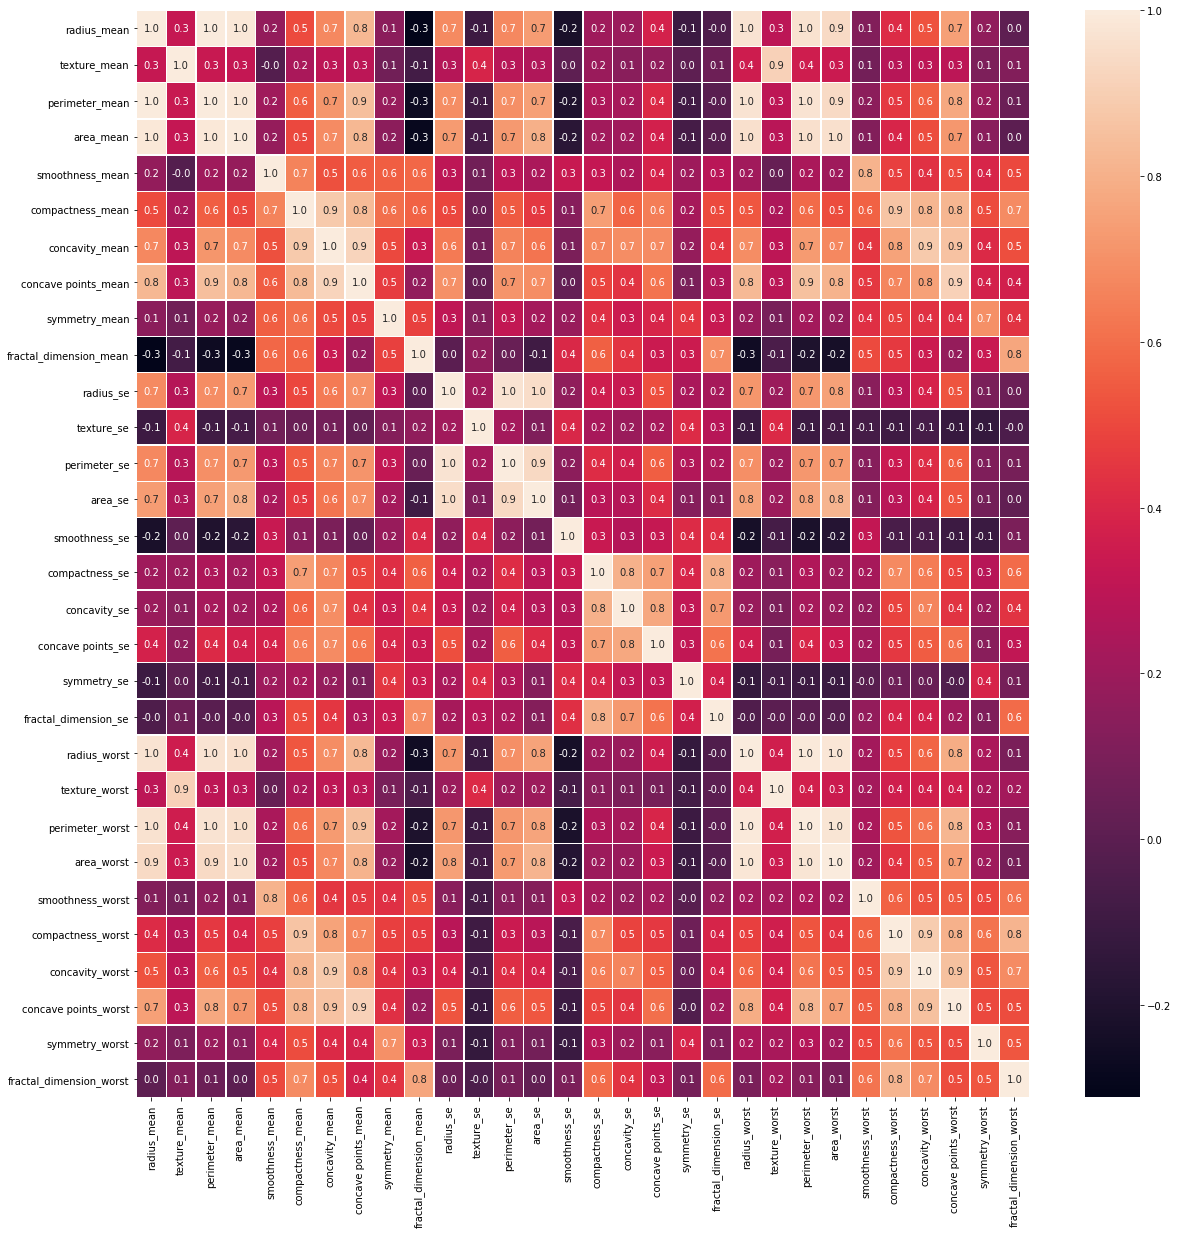

In [8]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [9]:
colunas = dados.columns

In [10]:
print("Number of columns = {}".format(len(colunas)))

Number of columns = 31


Boxplots to check the distribution of each variable

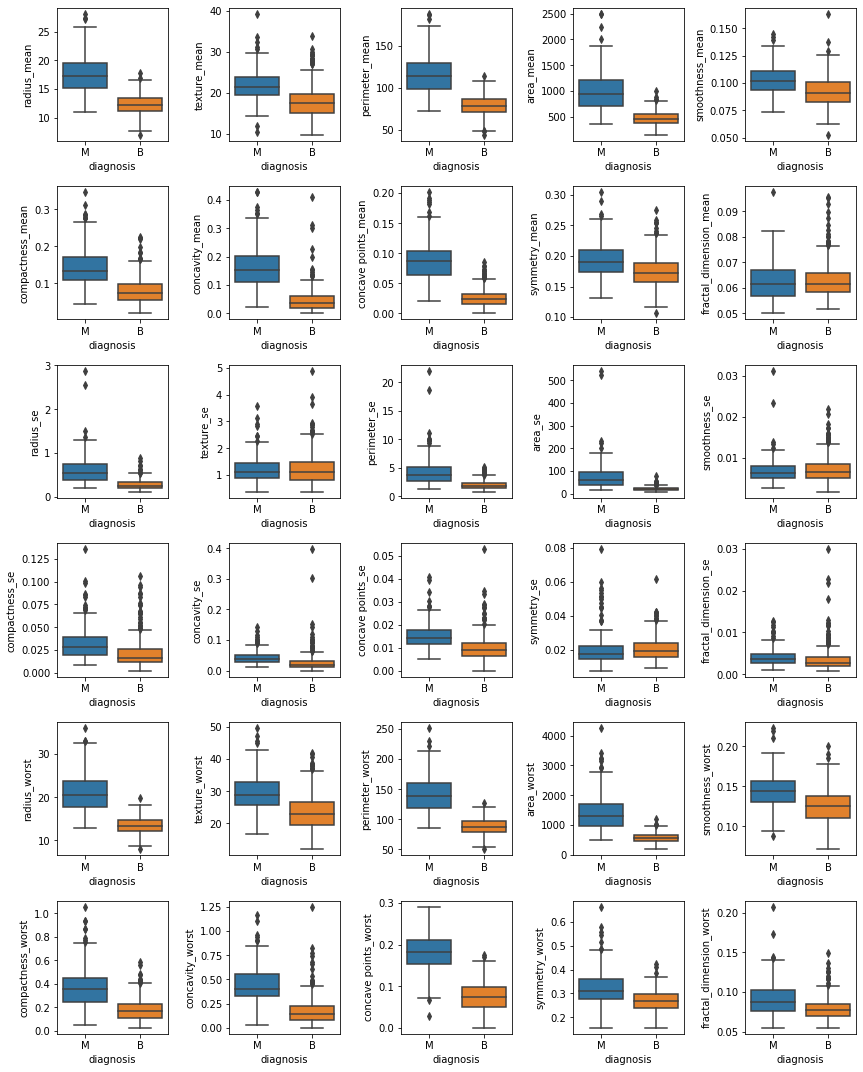

In [11]:
fig,ax=plt.subplots(6,5,figsize=(12,15))
sns.boxplot(y=dados[colunas[1]],x=dados['diagnosis'],ax=ax[0][0])
sns.boxplot(y=dados[colunas[2]],x=dados['diagnosis'],ax=ax[0][1])
sns.boxplot(y=dados[colunas[3]],x=dados['diagnosis'],ax=ax[0][2])
sns.boxplot(y=dados[colunas[4]],x=dados['diagnosis'],ax=ax[0][3])
sns.boxplot(y=dados[colunas[5]],x=dados['diagnosis'],ax=ax[0][4])

sns.boxplot(y=dados[colunas[6]],x=dados['diagnosis'],ax=ax[1][0])
sns.boxplot(y=dados[colunas[7]],x=dados['diagnosis'],ax=ax[1][1])
sns.boxplot(y=dados[colunas[8]],x=dados['diagnosis'],ax=ax[1][2])
sns.boxplot(y=dados[colunas[9]],x=dados['diagnosis'],ax=ax[1][3])
sns.boxplot(y=dados[colunas[10]],x=dados['diagnosis'],ax=ax[1][4])

sns.boxplot(y=dados[colunas[11]],x=dados['diagnosis'],ax=ax[2][0])
sns.boxplot(y=dados[colunas[12]],x=dados['diagnosis'],ax=ax[2][1])
sns.boxplot(y=dados[colunas[13]],x=dados['diagnosis'],ax=ax[2][2])
sns.boxplot(y=dados[colunas[14]],x=dados['diagnosis'],ax=ax[2][3])
sns.boxplot(y=dados[colunas[15]],x=dados['diagnosis'],ax=ax[2][4])

sns.boxplot(y=dados[colunas[16]],x=dados['diagnosis'],ax=ax[3][0])
sns.boxplot(y=dados[colunas[17]],x=dados['diagnosis'],ax=ax[3][1])
sns.boxplot(y=dados[colunas[18]],x=dados['diagnosis'],ax=ax[3][2])
sns.boxplot(y=dados[colunas[19]],x=dados['diagnosis'],ax=ax[3][3])
sns.boxplot(y=dados[colunas[20]],x=dados['diagnosis'],ax=ax[3][4])

sns.boxplot(y=dados[colunas[21]],x=dados['diagnosis'],ax=ax[4][0])
sns.boxplot(y=dados[colunas[22]],x=dados['diagnosis'],ax=ax[4][1])
sns.boxplot(y=dados[colunas[23]],x=dados['diagnosis'],ax=ax[4][2])
sns.boxplot(y=dados[colunas[24]],x=dados['diagnosis'],ax=ax[4][3])
sns.boxplot(y=dados[colunas[25]],x=dados['diagnosis'],ax=ax[4][4])

sns.boxplot(y=dados[colunas[26]],x=dados['diagnosis'],ax=ax[5][0])
sns.boxplot(y=dados[colunas[27]],x=dados['diagnosis'],ax=ax[5][1])
sns.boxplot(y=dados[colunas[28]],x=dados['diagnosis'],ax=ax[5][2])
sns.boxplot(y=dados[colunas[29]],x=dados['diagnosis'],ax=ax[5][3])
sns.boxplot(y=dados[colunas[30]],x=dados['diagnosis'],ax=ax[5][4])

plt.tight_layout()

Normalizing columns which values have a large range

In [12]:
colunas_normalizar = colunas.drop('diagnosis')

In [13]:
dados_norm = dados.copy()

Importing libraries to normalize the data and split into train and test samples

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder

Converting categorical variable diagnosis to numeric

In [15]:
enconder = LabelEncoder()
dados_norm['diagnosis'] = enconder.fit_transform(dados_norm['diagnosis'])

In [16]:
dados_norm.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Normalizing columns

In [17]:
scaler = RobustScaler()
for col in colunas_normalizar:
    dados_norm[col] = scaler.fit_transform(dados_norm[col].values.reshape(-1,1))

In [18]:
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Splitting into X and Y variables

In [19]:
X = dados_norm.drop(['diagnosis'],axis=1)
Y = dados_norm['diagnosis']

Splitting sample into training and testing

In [20]:
strat_kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for indice_treino, indice_teste in strat_kfold.split(X, Y):
    #print("Treino:", indice_treino, "Teste:", indice_teste)
    X_treino, X_teste = X.iloc[indice_treino], X.iloc[indice_teste]
    Y_treino, Y_teste = Y.iloc[indice_treino], Y.iloc[indice_teste]

Importing libraries to compute metrics

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,classification_report,recall_score

Using GridSearchCV to find the best inputs of each model

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
nome_modelo = []
resultados = []

In [24]:
acc = []
precision =[]
recall = []
f1 = []

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
print("Logistic Regression")
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000], 
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=2000), log_reg_params,n_jobs=8,cv=10,scoring='recall')
grid_log_reg.fit(X_treino, Y_treino)
logreg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(logreg, X_treino, Y_treino, cv=10,scoring='recall')
print("Best Estimator")
print(logreg)
print('Score Regressao Logistica Validacao Cruzada: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression
Best Estimator
LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Score Regressao Logistica Validacao Cruzada:  97.65%


In [27]:
nome_modelo.append("Logistic Regression")
resultados.append(log_reg_score)

In [28]:
logreg.fit(X_treino,Y_treino)
Y_pred_logreg = logreg.predict(X_teste)
cm_logreg = confusion_matrix(Y_teste,Y_pred_logreg)
acc_score_logreg = accuracy_score(Y_teste,Y_pred_logreg)
f1_score_logreg = f1_score(Y_teste,Y_pred_logreg)
precisao_logreg = average_precision_score(Y_teste,Y_pred_logreg)
recall_logreg = recall_score(Y_teste,Y_pred_logreg)
print('Acuracia Regressão Logistica ',round(acc_score_logreg*100,2).astype(str)+'%')
print('Precião média Regressão Logistica ',round(precisao_logreg*100,2).astype(str)+'%')
print('F1 Regressão Logistica ',round(f1_score_logreg*100,2).astype(str)+'%')
print('Recall Regressão Logistica ',round(recall_logreg*100,2).astype(str)+'%')

Acuracia Regressão Logistica  84.96%
Precião média Regressão Logistica  71.19%
F1 Regressão Logistica  83.17%
Recall Regressão Logistica  100.0%


In [29]:
acc.append(acc_score_logreg)
precision.append(precisao_logreg)
recall.append(recall_logreg)
f1.append(f1_score_logreg)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

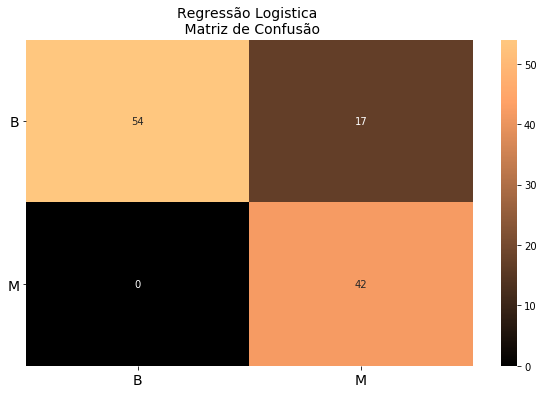

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_logreg, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Regressão Logistica \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [31]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

In [32]:
print("KNN")
knears_params = {"n_neighbors": list(range(5,40,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : list(range(3,40,1))}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params,n_jobs=8,cv=10,scoring='recall')
grid_knears.fit(X_treino, Y_treino)
knn = grid_knears.best_estimator_
knears_score = cross_val_score(knn, X_treino, Y_treino, cv=10,scoring='recall')
print("Best Estimator")
print(knn)
print('Score KNN Validacao Cruzada: ', round(knears_score.mean() * 100, 2).astype(str) + '%')

KNN
Best Estimator
KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
Score KNN Validacao Cruzada:  92.35%


In [33]:
nome_modelo.append("KNN")
resultados.append(knears_score)

In [34]:
knn.fit(X_treino,Y_treino)
Y_pred_knn = knn.predict(X_teste)
cm_knn = confusion_matrix(Y_teste,Y_pred_knn)
acc_score_knn = accuracy_score(Y_teste,Y_pred_knn)
f1_score_knn = f1_score(Y_teste,Y_pred_knn)
precisao_knn = average_precision_score(Y_teste,Y_pred_knn)
recall_knn = recall_score(Y_teste,Y_pred_knn)
print('Acuracia KNN ',round(acc_score_knn*100,2).astype(str)+'%')
print('Precião média KNN ',round(precisao_knn*100,2).astype(str)+'%')
print('F1 KNN ',round(f1_score_knn*100,2).astype(str)+'%')
print('Recall KNN ',round(recall_knn*100,2).astype(str)+'%')

Acuracia KNN  98.23%
Precião média KNN  97.01%
F1 KNN  97.56%
Recall KNN  95.24%


In [35]:
acc.append(acc_score_knn)
precision.append(precisao_knn)
recall.append(recall_knn)
f1.append(f1_score_knn)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

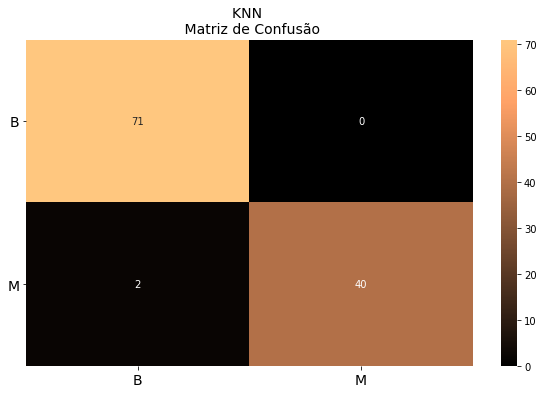

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_knn, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("KNN \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [38]:
print("Ada Boost Classifier")
ada_params = {'n_estimators' : [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80], 'learning_rate' : [0.001,0.01,0.1,1.0], 'algorithm' : ['SAMME','SAMME.R']}
grid_ada = GridSearchCV(AdaBoostClassifier(), ada_params,n_jobs=8,cv=10,scoring='recall')
grid_ada.fit(X_treino, Y_treino)
ada = grid_ada.best_estimator_
print("Best Estimator")
print(ada)
ada_score = cross_val_score(ada, X_treino, Y_treino, cv=10,scoring='recall')
print('Score AdaBoost Validacao Cruzada: ', round(ada_score.mean() * 100, 2).astype(str) + '%')

Ada Boost Classifier
Best Estimator
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=60, random_state=None)
Score AdaBoost Validacao Cruzada:  95.88%


In [39]:
nome_modelo.append("AdaBoost")
resultados.append(ada_score)

In [40]:
ada.fit(X_treino,Y_treino)
Y_pred_ada = ada.predict(X_teste)
cm_ada = confusion_matrix(Y_teste,Y_pred_ada)
acc_score_ada = accuracy_score(Y_teste,Y_pred_ada)
f1_score_ada = f1_score(Y_teste,Y_pred_ada)
precisao_ada = average_precision_score(Y_teste,Y_pred_ada)
recall_ada = recall_score(Y_teste,Y_pred_ada)
print('Acuracia ADA Boost ',round(acc_score_ada*100,2).astype(str)+'%')
print('Precião média Ada Boost ',round(precisao_ada*100,2).astype(str)+'%')
print('F1 Ada Boost ',round(f1_score_ada*100,2).astype(str)+'%')
print('Recall Ada Boost ',round(recall_ada*100,2).astype(str)+'%')

Acuracia ADA Boost  97.35%
Precião média Ada Boost  95.51%
F1 Ada Boost  96.3%
Recall Ada Boost  92.86%


In [41]:
acc.append(acc_score_ada)
precision.append(precisao_ada)
recall.append(recall_ada)
f1.append(f1_score_ada)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

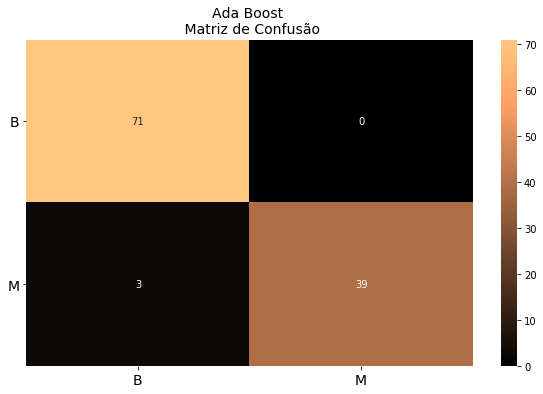

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_ada, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Ada Boost \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [43]:
print("Random Forest Classifier")
forest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,20,1)), 
              "min_samples_leaf": list(range(3,20,1)), 'max_features' : ['auto','sqrt','log2']}
forest = GridSearchCV(RandomForestClassifier(), forest_params,n_jobs=8,cv=10,scoring='recall')
forest.fit(X_treino, Y_treino)
random_forest = forest.best_estimator_
print("Best Estimator")
print(random_forest)
forest_score = cross_val_score(random_forest, X_treino, Y_treino, cv=10,scoring='recall')
print('Score RFC Validacao Cruzada: ', round(forest_score.mean() * 100, 2).astype(str) + '%')

Random Forest Classifier
Best Estimator
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score RFC Validacao Cruzada:  93.53%


In [44]:
nome_modelo.append("RFC")
resultados.append(forest_score)

In [45]:
random_forest.fit(X_treino,Y_treino)
Y_pred_rf = random_forest.predict(X_teste)
cm_rf = confusion_matrix(Y_teste,Y_pred_rf)
acc_score_rf = accuracy_score(Y_teste,Y_pred_rf)
f1_score_rf = f1_score(Y_teste,Y_pred_rf)
precisao_rf = average_precision_score(Y_teste,Y_pred_rf)
recall_rf = recall_score(Y_teste,Y_pred_rf)
print('Acuracia Random Forest ',round(acc_score_rf*100,2).astype(str)+'%')
print('Precião média Random Forest ',round(precisao_rf*100,2).astype(str)+'%')
print('F1 Random Forest ',round(f1_score_rf*100,2).astype(str)+'%')
print('Recall Random Forest ',round(recall_rf*100,2).astype(str)+'%')

Acuracia Random Forest  98.23%
Precião média Random Forest  95.45%
F1 Random Forest  97.67%
Recall Random Forest  100.0%


In [46]:
acc.append(acc_score_rf)
precision.append(precisao_rf)
recall.append(recall_rf)
f1.append(f1_score_rf)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

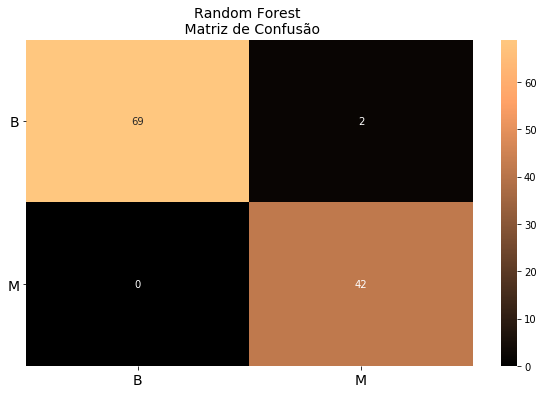

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_rf, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Random Forest \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [48]:
print("Gradient Boost Classifier")
grad_params = {'n_estimators' : [30,35,40,45,50,55,60,65,70], 'learning_rate' : [0.001,0.01,0.1,1.0], 'loss' : ['deviance','exponential'],
              'max_depth' : [3,4,5,6,7], 'max_features' : ['auto','sqrt','log2'], 'min_samples_leaf' : [2,3,4,5,6]}
grad = GridSearchCV(GradientBoostingClassifier(), grad_params,n_jobs=8,cv=10,scoring='recall')
grad.fit(X_treino, Y_treino)
grad_boost = grad.best_estimator_
print("Best Estimator")
print(grad_boost)
grad_score = cross_val_score(grad_boost, X_treino, Y_treino, cv=10,scoring='recall')
print('Score GradBoost Validacao Cruzada: ', round(grad_score.mean() * 100, 2).astype(str) + '%')

Gradient Boost Classifier
Best Estimator
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='exponential', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=65,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Score GradBoost Validacao Cruzada:  95.88%


In [49]:
nome_modelo.append("GradBoost")
resultados.append(grad_score)

In [50]:
grad_boost.fit(X_treino,Y_treino)
Y_pred_gb = grad_boost.predict(X_teste)
cm_gb = confusion_matrix(Y_teste,Y_pred_gb)
acc_score_gb = accuracy_score(Y_teste,Y_pred_gb)
f1_score_gb = f1_score(Y_teste,Y_pred_gb)
precisao_gb = average_precision_score(Y_teste,Y_pred_gb)
recall_gb = recall_score(Y_teste,Y_pred_gb)
print('Acuracia Gradient Boosting ',round(acc_score_gb*100,2).astype(str)+'%')
print('Precião média Gradient Boosting  ',round(precisao_gb*100,2).astype(str)+'%')
print('F1 Gradient Boosting  ',round(f1_score_gb*100,2).astype(str)+'%')
print('Recall Gradient Boosting  ',round(recall_gb*100,2).astype(str)+'%')

Acuracia Gradient Boosting  99.12%
Precião média Gradient Boosting   97.67%
F1 Gradient Boosting   98.82%
Recall Gradient Boosting   100.0%


In [51]:
acc.append(acc_score_gb)
precision.append(precisao_gb)
recall.append(recall_gb)
f1.append(f1_score_gb)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

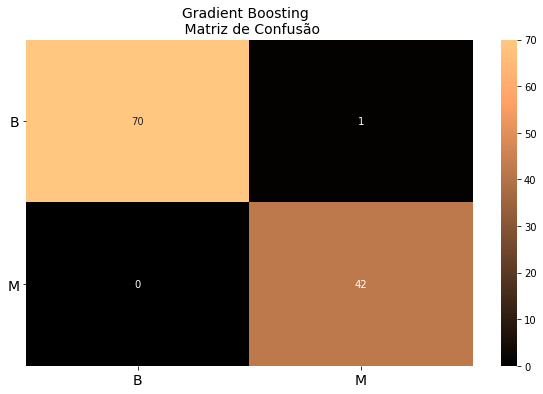

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_gb, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Gradient Boosting  \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

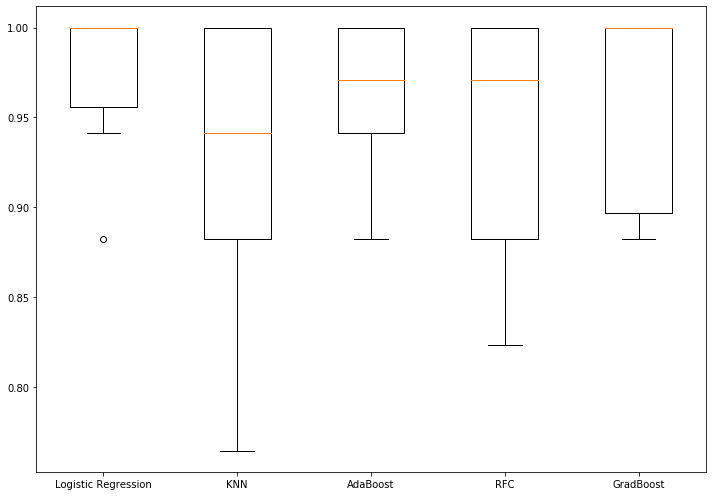

In [53]:
fig,ax=plt.subplots(figsize=(10,7))
plt.boxplot(resultados)
ax.set_xticklabels(nome_modelo)
plt.tight_layout()

In [54]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

Using TensorFlow backend.


In [55]:
n_inputs = X_treino.shape[1]

In [56]:
modelo = Sequential()
modelo.add(Dense(32, input_shape=(n_inputs, ), activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(Dropout(0.5))
modelo.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros'))
modelo.add(Dropout(0.5))
modelo.add(Dense(2, activation='softmax', kernel_initializer='glorot_uniform',bias_initializer='zeros'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [57]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, mode='auto', min_delta=0.0001)

In [58]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [59]:
callbacks_list = [reduce_lr,es]

In [60]:
modelo.compile(Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(X_treino, Y_treino, batch_size=20, epochs=200, verbose=2, validation_data=(X_teste,Y_teste),callbacks=callbacks_list)


Train on 456 samples, validate on 113 samples
Epoch 1/200
 - 1s - loss: 0.3609 - accuracy: 0.8487 - val_loss: 0.1391 - val_accuracy: 0.9381
Epoch 2/200
 - 0s - loss: 0.1714 - accuracy: 0.9539 - val_loss: 0.0849 - val_accuracy: 0.9823
Epoch 3/200
 - 0s - loss: 0.0938 - accuracy: 0.9737 - val_loss: 0.0723 - val_accuracy: 0.9735
Epoch 4/200
 - 0s - loss: 0.0870 - accuracy: 0.9693 - val_loss: 0.0755 - val_accuracy: 0.9823
Epoch 5/200
 - 0s - loss: 0.0877 - accuracy: 0.9671 - val_loss: 0.1550 - val_accuracy: 0.9646

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 6/200
 - 0s - loss: 0.0685 - accuracy: 0.9737 - val_loss: 0.0938 - val_accuracy: 0.9735
Epoch 7/200
 - 0s - loss: 0.0419 - accuracy: 0.9825 - val_loss: 0.1006 - val_accuracy: 0.9823
Epoch 8/200
 - 0s - loss: 0.0348 - accuracy: 0.9846 - val_loss: 0.1156 - val_accuracy: 0.9823

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 9/200
 - 0s - loss: 0.0239 - accur

In [61]:
Y_pred_keras = modelo.predict_classes(X_teste, batch_size=50, verbose=0)

In [62]:
cm_keras = confusion_matrix(Y_teste,Y_pred_keras)
acc_score_keras = accuracy_score(Y_teste,Y_pred_keras)
f1_score_keras = f1_score(Y_teste,Y_pred_keras)
precisao_keras = average_precision_score(Y_teste,Y_pred_keras)
recall_keras = recall_score(Y_teste,Y_pred_keras)
print('Acuracia Keras ',round(acc_score_keras*100,2).astype(str)+'%')
print('Precião média Keras  ',round(precisao_keras*100,2).astype(str)+'%')
print('F1 Gradient Boosting  ',round(f1_score_keras*100,2).astype(str)+'%')
print('Recall Keras  ',round(recall_keras*100,2).astype(str)+'%')

Acuracia Keras  98.23%
Precião média Keras   95.45%
F1 Gradient Boosting   97.67%
Recall Keras   100.0%


In [63]:
acc.append(acc_score_keras)
precision.append(precisao_keras)
recall.append(recall_keras)
f1.append(f1_score_keras)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

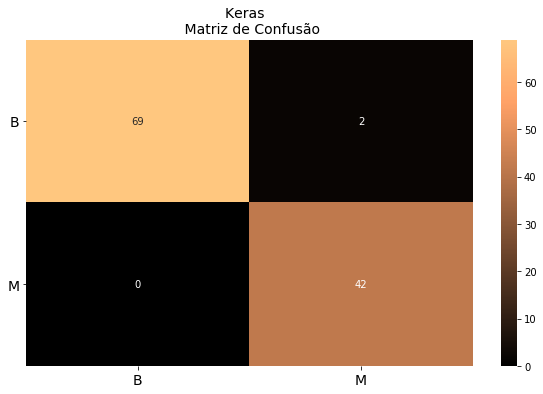

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_keras, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Keras  \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

Choosing the K best features

In [65]:
from sklearn.feature_selection import SelectKBest,chi2

In [66]:
dados['diagnosis'] = enconder.fit_transform(dados['diagnosis'])

In [67]:
X = dados.drop(['diagnosis'],axis=1)
Y = dados['diagnosis']

In [68]:
def find_best_features(X,Y,n):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=42)
    best_features = SelectKBest(chi2, k=n).fit(X_treino, Y_treino)
    X_treino = best_features.transform(X_treino)
    X_teste = best_features.transform(X_teste)
    acc,precision,recall,f1 = best_logred_model(X_treino,Y_treino,X_teste,Y_teste)
    return acc, precision, recall, f1

In [69]:
def best_logred_model(X_treino_best,Y_treino_best,X_teste,Y_teste):
    #print("Logistic Regression")
    log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1e3,1e4,1e5,1e6], 
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    grid_log_reg = GridSearchCV(LogisticRegression(max_iter=2000), log_reg_params,n_jobs=8,cv=10)
    grid_log_reg.fit(X_treino_best, Y_treino_best)
    logreg = grid_log_reg.best_estimator_
    logreg.fit(X_treino_best,Y_treino_best)
    Y_pred_Kbest = logreg.predict(X_teste)
    acc_kest = accuracy_score(Y_teste,Y_pred_Kbest)
    f1_kbest = f1_score(Y_teste,Y_pred_Kbest)
    precisao_kbest = average_precision_score(Y_teste,Y_pred_Kbest)
    recall_kbest = recall_score(Y_teste,Y_pred_Kbest)
    return acc_kest,precisao_kbest,recall_kbest,f1_kbest

In [70]:
acc = []
rec = []
prec = []
f1s= []
n_idex = []

for n in range(5,len(dados.columns)-1):
    acuracia,precisao,recall,f1 = find_best_features(X,Y,n)
    acc.append(acuracia)
    rec.append(recall)
    prec.append(precisao)
    f1s.append(f1)
    n_idex.append(n)
    print("N = ",n,"Acc = ",acuracia, "Prec = ",precisao, "Rec = ",recall, "F1 = ",f1)
    
dic_kbest = {"N" : n_idex, "Acuracia" : acc, "Recall" : rec, "Precision" : prec, "F1" : f1s}

dataframe_kbest = pd.DataFrame(dic_kbest)

N =  5 Acc =  0.9766081871345029 Prec =  0.944553691922113 Rec =  0.9841269841269841 F1 =  0.96875
N =  6 Acc =  0.9766081871345029 Prec =  0.9543120095320268 Rec =  0.9523809523809523 F1 =  0.9677419354838709
N =  7 Acc =  0.9707602339181286 Prec =  0.9392028458242381 Rec =  0.9523809523809523 F1 =  0.96
N =  8 Acc =  0.9766081871345029 Prec =  0.9492116534723051 Rec =  0.9682539682539683 F1 =  0.9682539682539683
N =  9 Acc =  0.9766081871345029 Prec =  0.9492116534723051 Rec =  0.9682539682539683 F1 =  0.9682539682539683
N =  10 Acc =  0.9707602339181286 Prec =  0.9392028458242381 Rec =  0.9523809523809523 F1 =  0.96


/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

N =  11 Acc =  0.9766081871345029 Prec =  0.9492116534723051 Rec =  0.9682539682539683 F1 =  0.9682539682539683
N =  12 Acc =  0.9707602339181286 Prec =  0.934562969924812 Rec =  0.9682539682539683 F1 =  0.9606299212598425
N =  13 Acc =  0.9766081871345029 Prec =  0.9492116534723051 Rec =  0.9682539682539683 F1 =  0.9682539682539683
N =  14 Acc =  0.9824561403508771 Prec =  0.9592209690893901 Rec =  0.9841269841269841 F1 =  0.9763779527559054
N =  15 Acc =  0.9707602339181286 Prec =  0.9303308776992988 Rec =  0.9841269841269841 F1 =  0.9612403100775193
N =  16 Acc =  0.9590643274853801 Prec =  0.903140203449801 Rec =  0.9841269841269841 F1 =  0.9465648854961831


/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


N =  17 Acc =  0.9707602339181286 Prec =  0.9303308776992988 Rec =  0.9841269841269841 F1 =  0.9612403100775193
N =  18 Acc =  0.9590643274853801 Prec =  0.9065973013341434 Rec =  0.9682539682539683 F1 =  0.9457364341085271
N =  19 Acc =  0.9532163742690059 Prec =  0.8932405640968092 Rec =  0.9682539682539683 F1 =  0.9384615384615386
N =  20 Acc =  0.9707602339181286 Prec =  0.934562969924812 Rec =  0.9682539682539683 F1 =  0.9606299212598425
N =  21 Acc =  0.9707602339181286 Prec =  0.934562969924812 Rec =  0.9682539682539683 F1 =  0.9606299212598425
N =  22 Acc =  0.9649122807017544 Prec =  0.916532625095076 Rec =  0.9841269841269841 F1 =  0.9538461538461538
N =  23 Acc =  0.9766081871345029 Prec =  0.944553691922113 Rec =  0.9841269841269841 F1 =  0.96875


/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


N =  24 Acc =  0.9649122807017544 Prec =  0.9203650151018572 Rec =  0.9682539682539683 F1 =  0.953125
N =  25 Acc =  0.9649122807017544 Prec =  0.9203650151018572 Rec =  0.9682539682539683 F1 =  0.953125
N =  26 Acc =  0.9766081871345029 Prec =  0.944553691922113 Rec =  0.9841269841269841 F1 =  0.96875
N =  27 Acc =  0.9766081871345029 Prec =  0.944553691922113 Rec =  0.9841269841269841 F1 =  0.96875
N =  28 Acc =  0.9766081871345029 Prec =  0.944553691922113 Rec =  0.9841269841269841 F1 =  0.96875
N =  29 Acc =  0.9766081871345029 Prec =  0.944553691922113 Rec =  0.9841269841269841 F1 =  0.96875


In [71]:
dataframe_kbest = dataframe_kbest.sort_values(by=['Acuracia','Recall','F1','Precision'],ascending=False).reset_index()

In [72]:
best_n = int(dataframe_kbest.iloc[0]['N'])

In [73]:
X_treino_best, X_teste_best, Y_treino_best, Y_teste_best = train_test_split(X, Y, test_size=0.3, random_state=42)

In [74]:
modelo_kbest = SelectKBest(chi2, k=int(best_n)).fit(X_treino_best, Y_treino_best)
X_treino_best = modelo_kbest.transform(X_treino_best)#.values
X_teste_best = modelo_kbest.transform(X_teste_best)#.values
Y_treino_best = Y_treino_best.values
Y_teste_best = Y_teste_best.values

In [75]:
acc_kbest = []
precison_kbest =[]
recall_kbest = []
f1_kbest = []

In [76]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1e3,1e4,1e5,1e6], 
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=2000), log_reg_params,n_jobs=8,cv=10,scoring='recall')
grid_log_reg.fit(X_treino_best, Y_treino_best)
logreg = grid_log_reg.best_estimator_
logreg.fit(X_treino_best,Y_treino_best)
Y_pred_best = logreg.predict(X_teste_best)
cm_best = confusion_matrix(Y_teste_best,Y_pred_best)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

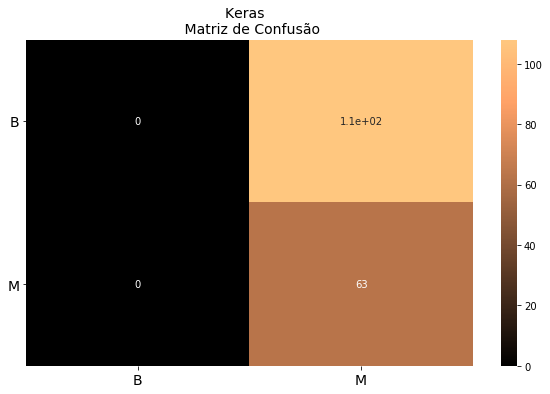

In [77]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_best, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Keras  \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [78]:
acc_score_logreg_best = accuracy_score(Y_teste_best,Y_pred_best)
f1_score_logreg_best = f1_score(Y_teste_best,Y_pred_best)
precisao_logreg_best = average_precision_score(Y_teste_best,Y_pred_best)
recall_logreg_best = recall_score(Y_teste_best,Y_pred_best)
print('Acuracia Regressão Logistica ',round(acc_score_logreg_best*100,2).astype(str)+'%')
print('Precião média Regressão Logistica ',round(precisao_logreg_best*100,2).astype(str)+'%')
print('F1 Regressão Logistica ',round(f1_score_logreg_best*100,2).astype(str)+'%')
print('Recall Regressão Logistica ',round(recall_logreg_best*100,2).astype(str)+'%')

Acuracia Regressão Logistica  36.84%
Precião média Regressão Logistica  36.84%
F1 Regressão Logistica  53.85%
Recall Regressão Logistica  100.0%


In [79]:
acc_kbest.append(acc_score_logreg_best)
precison_kbest.append(precisao_logreg_best)
recall_kbest.append(recall_logreg_best)
f1_kbest.append(f1_score_logreg_best)

In [80]:
knears_params = {"n_neighbors": list(range(5,40,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : list(range(2,40,1))}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params,n_jobs=8,cv=10,scoring='recall')
grid_knears.fit(X_treino_best, Y_treino_best)
knn = grid_knears.best_estimator_
knn.fit(X_treino_best,Y_treino_best)
Y_pred_best_knn = knn.predict(X_teste_best)
cm_best_knn = confusion_matrix(Y_teste_best,Y_pred_best_knn)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

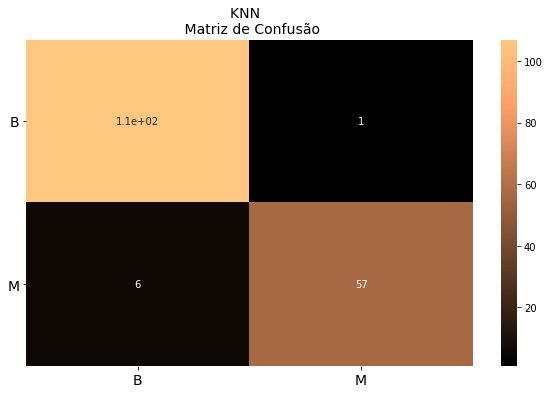

In [81]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_best_knn, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("KNN  \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [82]:
acc_score_knn = accuracy_score(Y_teste_best,Y_pred_best_knn)
f1_score_knn = f1_score(Y_teste_best,Y_pred_best_knn)
precisao_knn = average_precision_score(Y_teste_best,Y_pred_best_knn)
recall_knn = recall_score(Y_teste_best,Y_pred_best_knn)
print('Acuracia Regressão Logistica ',round(acc_score_knn*100,2).astype(str)+'%')
print('Precião média Regressão Logistica ',round(precisao_knn*100,2).astype(str)+'%')
print('F1 Regressão Logistica ',round(f1_score_knn*100,2).astype(str)+'%')
print('Recall Regressão Logistica ',round(recall_knn*100,2).astype(str)+'%')

Acuracia Regressão Logistica  95.91%
Precião média Regressão Logistica  92.43%
F1 Regressão Logistica  94.21%
Recall Regressão Logistica  90.48%


In [83]:
acc_kbest.append(acc_score_knn)
precison_kbest.append(precisao_knn)
recall_kbest.append(recall_knn)
f1_kbest.append(f1_score_knn)

In [84]:
ada_params = {'n_estimators' : list(range(5,81)), 'learning_rate' : [0.001,0.01,0.1,1.0], 'algorithm' : ['SAMME','SAMME.R']}
grid_ada = GridSearchCV(AdaBoostClassifier(), ada_params,n_jobs=8,cv=10,scoring='recall')
grid_ada.fit(X_treino_best, Y_treino_best)
ada = grid_ada.best_estimator_
ada.fit(X_treino_best,Y_treino_best)
Y_pred_best_ada = ada.predict(X_teste_best)
cm_best_ada = confusion_matrix(Y_teste_best,Y_pred_best_ada)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

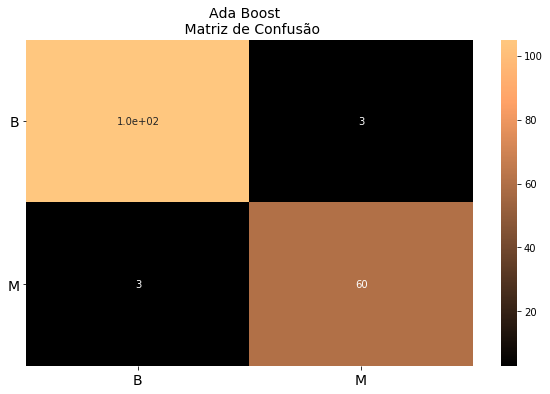

In [85]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_best_ada, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Ada Boost  \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [86]:
acc_score_ada_best = accuracy_score(Y_teste_best,Y_pred_best_ada)
f1_score_ada_best = f1_score(Y_teste_best,Y_pred_best_ada)
precisao_ada_best = average_precision_score(Y_teste_best,Y_pred_best_ada)
recall_ada_best = recall_score(Y_teste_best,Y_pred_best_ada)
print('Acuracia Regressão Logistica ',round(acc_score_ada_best*100,2).astype(str)+'%')
print('Precião média Regressão Logistica ',round(precisao_ada_best*100,2).astype(str)+'%')
print('F1 Regressão Logistica ',round(f1_score_ada_best*100,2).astype(str)+'%')
print('Recall Regressão Logistica ',round(recall_ada_best*100,2).astype(str)+'%')

Acuracia Regressão Logistica  96.49%
Precião média Regressão Logistica  92.46%
F1 Regressão Logistica  95.24%
Recall Regressão Logistica  95.24%


In [87]:
acc_kbest.append(acc_score_ada_best)
precison_kbest.append(precisao_ada_best)
recall_kbest.append(recall_ada_best)
f1_kbest.append(f1_score_ada_best)